<a href="https://colab.research.google.com/github/prahlad-pallav/Stock_Market_Analysis/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Install required libraries
!pip install yfinance scikit-learn matplotlib pandas --quiet

In [2]:
# 📥 Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# 📄 List of Nifty 50 Tickers (Yahoo Finance format)
nifty_50_tickers = [
    "ADANIENT.NS", "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS",
    "BAJAJFINSV.NS", "BAJFINANCE.NS", "BHARTIARTL.NS", "BPCL.NS", "BRITANNIA.NS",
    "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS",
    "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS", "HEROMOTOCO.NS",
    "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS", "INFY.NS",
    "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LTIM.NS", "LT.NS",
    "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS",
    "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS", "SBIN.NS", "SHRIRAMFIN.NS",
    "SUNPHARMA.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TCS.NS",
    "TECHM.NS", "TITAN.NS", "ULTRACEMCO.NS", "UPL.NS", "WIPRO.NS"
]

In [5]:
# ⏬ Download Adjusted Close Prices for All Stocks
print("Downloading data... (may take a minute)")
data = yf.download(nifty_50_tickers, start="2020-01-01", end="2025-01-01")['Close']
print("Download complete.")

/tmp/ipython-input-5-2901455297.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(nifty_50_tickers, start="2020-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  50 of 50 completed


Download complete.


In [6]:
# 📈 Calculate Daily Returns
returns = data.pct_change().dropna()

In [7]:
# 🧠 Apply PCA
pca = PCA()
pca_result = pca.fit_transform(returns)

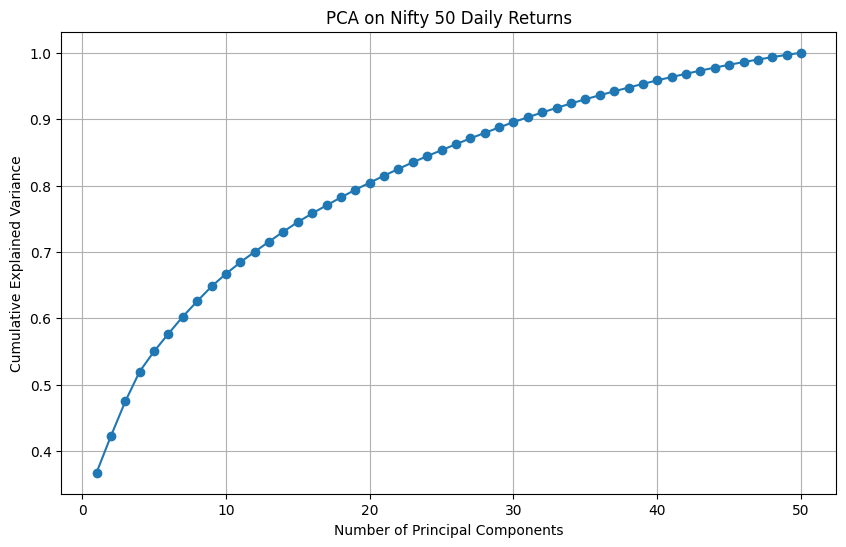

In [8]:
# 📊 Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA on Nifty 50 Daily Returns')
plt.grid(True)
plt.show()

In [10]:
# 🧾 Show Explained Variance for Top 5 Components
for i, var in enumerate(pca.explained_variance_ratio_[:5], 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}% of variance)")

PC1: 0.3675 (36.75% of variance)
PC2: 0.0551 (5.51% of variance)
PC3: 0.0522 (5.22% of variance)
PC4: 0.0451 (4.51% of variance)
PC5: 0.0303 (3.03% of variance)
